In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [8]:
df['Glucose'].value_counts

<bound method IndexOpsMixin.value_counts of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

In [9]:
zero_g=df['Glucose'].value_counts().get(0,0)
print(zero_g)


5


In [10]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [11]:
zero_b=df['BloodPressure'].value_counts().get(0,0)
print(zero_b)


35


In [12]:
zero_s=df['SkinThickness'].value_counts().get(0,0)
print(zero_s)

227


In [13]:
zero_ı=df['Insulin'].value_counts().get(0,0)
print(zero_ı)

374


In [14]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


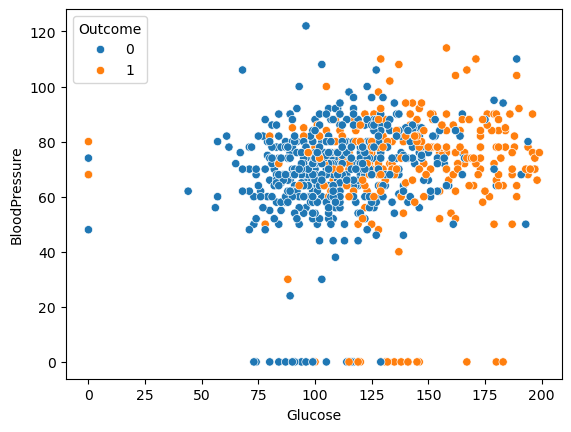

In [15]:
sns.scatterplot(x=df["Glucose"],y=df["BloodPressure"],hue=df['Outcome'])
plt.show()

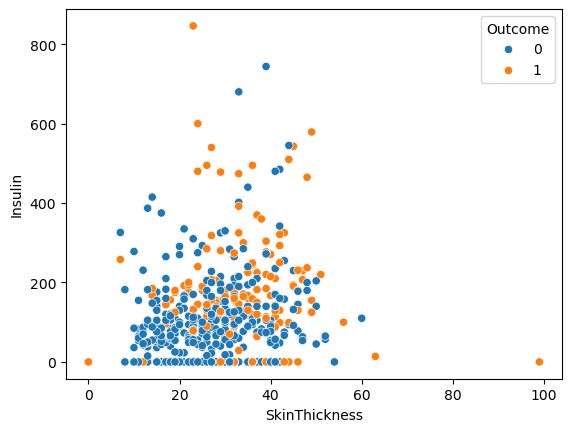

In [16]:
sns.scatterplot(x=df['SkinThickness'],y=df['Insulin'],hue=df['Outcome'])
plt.show()

In [17]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

# 0’ları NaN’a çevir
X_train_replaced = X_train.replace(0, np.nan)
X_test_replaced  = X_test.replace(0, np.nan)

# median imputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_replaced)  # median’ı train’den öğrenir

X_train_imputed = imputer.transform(X_train_replaced)
X_test_imputed  = imputer.transform(X_test_replaced)


In [21]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,3.781250,118.640625,69.729167,20.557292,75.901042,32.170833,0.454875,33.239583
std,3.287938,33.520971,16.822746,15.099906,110.435244,7.754714,0.337909,11.984060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,95.000000,62.000000,0.000000,0.000000,27.475000,0.218750,24.000000
50%,3.000000,114.000000,70.000000,24.000000,0.000000,32.350000,0.344000,29.000000
75%,6.000000,138.000000,78.000000,32.000000,119.750000,36.650000,0.596250,40.250000
max,14.000000,199.000000,110.000000,52.000000,540.000000,55.000000,2.288000,81.000000


In [22]:
X_train_imputed = pd.DataFrame(
    X_train_imputed,
    columns=X_train.columns,
    index=X_train.index
)

X_test_imputed = pd.DataFrame(
    X_test_imputed,
    columns=X_test.columns,
    index=X_test.index
)

# Artık describe çalışır:
X_test_imputed.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,4.281250,119.869792,71.604167,28.713542,141.005208,32.672396,0.454875,33.239583
std,2.961191,31.221028,12.341968,7.861779,78.620202,6.605061,0.337909,11.984060
min,1.000000,56.000000,30.000000,7.000000,32.000000,19.600000,0.084000,21.000000
25%,2.000000,96.000000,62.000000,25.750000,125.000000,27.650000,0.218750,24.000000
50%,4.000000,114.000000,70.000000,29.000000,125.000000,32.350000,0.344000,29.000000
75%,6.000000,138.000000,78.000000,32.000000,125.000000,36.650000,0.596250,40.250000
max,14.000000,199.000000,110.000000,52.000000,540.000000,55.000000,2.288000,81.000000


In [23]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
X_train_imputed=model.fit_transform(X_train_imputed)
X_test_imputed=model.transform(X_test_imputed)

In [24]:
from sklearn.svm import SVC
SVC=SVC()

In [25]:
SVC.fit(X_train_imputed,y_train)

SVC()

In [26]:
y_pred=SVC.predict(X_test_imputed)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('accuracy_score: ',accuracy_score(y_test, y_pred))
print('classification_report: ',classification_report(y_test, y_pred))
print('confusion_matrix: ',confusion_matrix(y_test, y_pred))


accuracy_score:  0.7552083333333334
classification_report:                precision    recall  f1-score   support

           0       0.79      0.87      0.83       130
           1       0.65      0.52      0.58        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192

confusion_matrix:  [[113  17]
 [ 30  32]]


In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb= GaussianNB()

In [30]:
gnb.fit(X_train_imputed,y_train)

GaussianNB()

In [31]:
y_pred=gnb.predict(X_test_imputed)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

confusion matrix: 
 [[106  24]
 [ 25  37]]
accuracy score:  0.7447916666666666
classification report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       130
           1       0.61      0.60      0.60        62

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_imputed, y_train)

y_pred = rf.predict(X_test_imputed)

print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

confusion matrix: 
 [[107  23]
 [ 27  35]]
accuracy score:  0.7395833333333334
classification report:                precision    recall  f1-score   support

           0       0.80      0.82      0.81       130
           1       0.60      0.56      0.58        62

    accuracy                           0.74       192
   macro avg       0.70      0.69      0.70       192
weighted avg       0.74      0.74      0.74       192

